In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
raw = pd.read_excel('data/goodreads_library_export.xlsx')

In [22]:
raw.head()

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies
0,3265644,Artificial Intelligence: A Modern Approach,Stuart Russell,"Russell, Stuart",Peter Norvig,0136042597,9.780136e+12,0,4.19,Pearson,...,2023-01-31,2023-07-11,data-science,data-science (#3),read,NaN,NaN,NaN,1,0
1,30422190,Data Mining: Practical Machine Learning Tools ...,Ian H. Witten,"Witten, Ian H.","Eibe Frank, Mark A. Hall, Christopher J. Pal",0128042915,9.780128e+12,0,3.89,Morgan Kaufmann,...,2022-07-20,2023-07-11,data-science,data-science (#5),read,NaN,NaN,NaN,1,0
2,17980991,Learning SPARQL: Querying and Updating with SP...,Bob DuCharme,"DuCharme, Bob",NaN,1449371434,9.781449e+12,0,4.03,O'Reilly Media,...,2023-04-01,2023-07-11,data-science,data-science (#2),read,NaN,NaN,NaN,1,0
3,50040746,Mathematics for Machine Learning,Marc Deisenroth,"Deisenroth, Marc","A. Aldo Faisal, Cheng Soon Ong",110845514X,9.781108e+12,0,4.34,Cambridge University Press,...,2022-09-15,2023-07-11,data-science,data-science (#4),read,NaN,NaN,NaN,1,0
4,29488592,Understanding Machine Learning: From Theory To...,CAMBRIDGE INDIA,"INDIA, CAMBRIDGE",NaN,1107512824,9.781108e+12,0,4.21,Shai Shalev-Shwartz,...,2023-06-01,2023-07-11,data-science,data-science (#1),read,NaN,NaN,NaN,1,0


In [23]:
raw.columns

Index(['Book Id', 'Title', 'Author', 'Author l-f', 'Additional Authors',
       'ISBN', 'ISBN13', 'My Rating', 'Average Rating', 'Publisher', 'Binding',
       'Number of Pages', 'Year Published', 'Original Publication Year',
       'Date Read', 'Date Added', 'Bookshelves', 'Bookshelves with positions',
       'Exclusive Shelf', 'My Review', 'Spoiler', 'Private Notes',
       'Read Count', 'Owned Copies'],
      dtype='object')

In [32]:
raw.shape

(266, 24)

In [24]:
df = raw.drop(['Book Id','Author l-f', 'Additional Authors','My Rating', 
               'Average Rating', 'Bookshelves with positions',
               'Exclusive Shelf', 'My Review', 'Spoiler', 'Private Notes'],
               axis=1)

In [25]:
df = df.drop_duplicates()

In [36]:
grouped = df.groupby(['Year Published']).count()['Title']

In [40]:
df[df['Year Published']==1656.0]

,Title,Author,ISBN,ISBN13,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Read Count,Owned Copies
79,The Academy - Thief: Volume 1 (The Scarab Beet...,C.L. Stone,NaN,NaN,CreateSpace Independent Publishing Platform (2...,Paperback,NaN,1656.0,2014.0,NaT,2023-08-03,NaN,1,0


In [41]:
df.loc[79,['Year Published']] = 2014.0

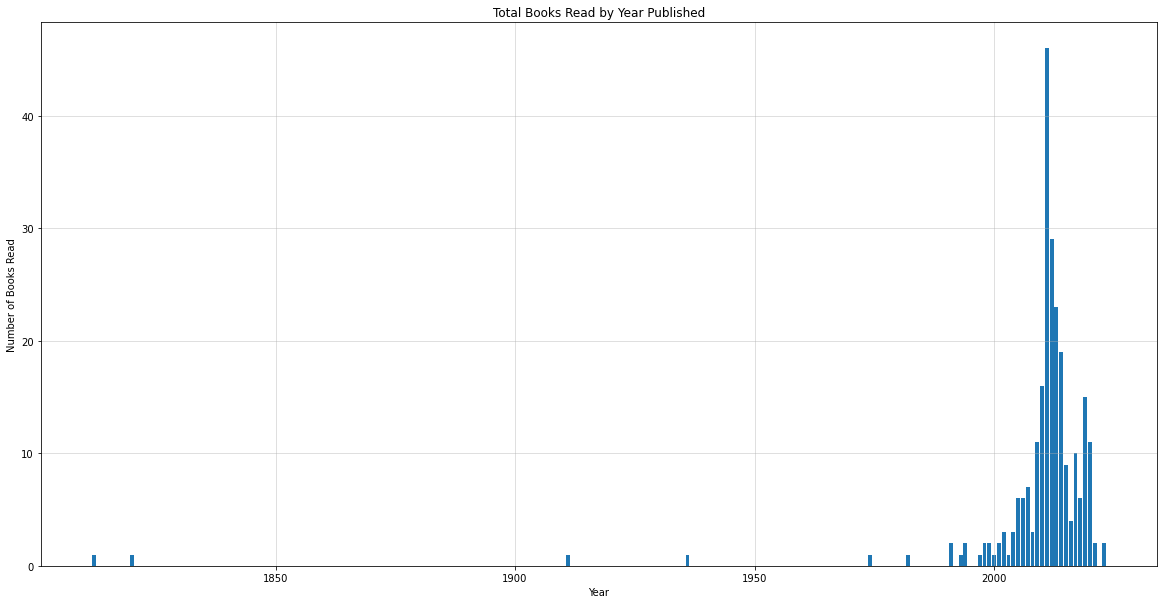

In [78]:
tmp = df.groupby(['Original Publication Year']).count()['Title']

plt.figure(figsize=(20,10))
plt.bar(tmp.index, tmp.values)
plt.title('Total Books Read by Year Published')
plt.xlabel('Year')
plt.ylabel('Number of Books Read')
plt.grid(alpha=0.5)

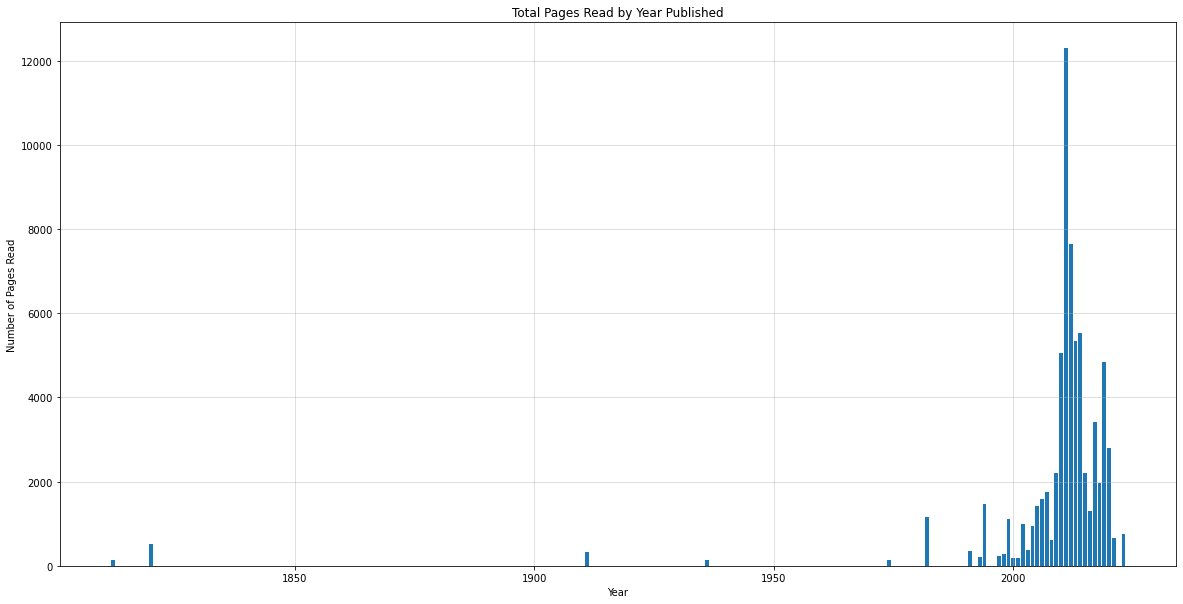

In [81]:
tmp = df.groupby(['Original Publication Year']).sum()['Number of Pages']

plt.figure(figsize=(20,10))
plt.bar(tmp.index, tmp.values)
plt.title('Total Pages Read by Year Published')
plt.xlabel('Year')
plt.ylabel('Number of Pages Read')
plt.grid(alpha=0.5)